<a href="https://colab.research.google.com/github/lauraluebbert/PhD_thesis/blob/main/Chapter1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# Chapter 1 - Introduction
## From Bench to Computer - Figure 2
The following overview of scRNAseq tools was downloaded from the [scRNA-tools](https://www.scrna-tools.org/table) website on Februaray 10th, 2024:

In [2]:
# Downlaod copy of database stored on GitHub
!wget https://raw.githubusercontent.com/lauraluebbert/PhD_thesis/main/files/2-10-2024_scRNA_tools.csv

--2024-02-10 21:24:09--  https://raw.githubusercontent.com/lauraluebbert/PhD_thesis/main/files/2-10-2024_scRNA_tools.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 489022 (478K) [text/plain]
Saving to: ‘2-10-2024_scRNA_tools.csv.1’

2-10-2024_scRNA_too 100%[===================>] 477.56K  --.-KB/s    in 0.04s   

2024-02-10 21:24:09 (13.2 MB/s) - ‘2-10-2024_scRNA_tools.csv.1’ saved [489022/489022]



In [59]:
tool_df = pd.read_csv("2-10-2024_scRNA_tools.csv")
tool_df

,Name,Platform,DOIs,Pub Dates,Citations,Code,Description,License,Categories,Updated
0,acorde,R,"10.1038/s41467-022-29497-w, 10.1101/2021.05.07...","2022-04-05, NA",8,https://github.com/ConesaLab/acorde,Isoform co-usage networks from single-cell RNA...,GPL-3.0,"Alternative Splicing, Differential Expression,...",2022-04-30
1,ACTINN,Python,"10.1093/bioinformatics/btz592, 10.1101/532093","2019-07-29, NA",128,https://github.com/mafeiyang/ACTINN,ACTINN (Automated Cell Type Identification usi...,GPL-3.0,Classification,2021-06-28
2,ACTION,C++/R/MATLAB,"10.1038/s41467-018-03933-2, 10.1101/081273","2018-04-17, NA",44,http://compbio.mit.edu/ACTION,ACTION infers the functional identity of cells...,'-,"Clustering, Dimensionality Reduction, Gene Net...",2021-06-28
3,ACTIONet,R/C++,"10.1038/s41467-020-18416-6, 10.1101/746339","2020-10-26, NA",34,https://github.com/shmohammadi86/ACTIONet,Robust multi-resolution analysis of single-cel...,GPL-2.0-or-later,"Classification, Clustering, Dimensionality Red...",2021-06-11
4,ACTIVA,Python,"10.1093/bioinformatics/btac095, 10.1101/2021.0...","2022-02-18, NA",13,https://github.com/SindiLab/ACTIVA,Realistic scRNAseq Generation with Automatic C...,MIT,Simulation,2022-03-04
...,...,...,...,...,...,...,...,...,...,...
1701,ZINB-WaVE,R,"10.1038/s41467-017-02554-5, 10.1101/125112, 10...","2018-01-18, NA, NA, NA, 2018-02-26",677,https://github.com/drisso/zinbwave,Zero-inflated Negative Binomial based Wanted V...,'-,"Dimensionality Reduction, Normalisation, Simul...",2019-10-02
1702,ZINBAE,Python,10.1016/j.ymeth.2020.09.010,2021-08,10,https://github.com/ttgump/ZINBAE,Zero-Inflated Negative Binomial (ZINB) model-b...,MIT,Imputation,2020-10-05
1703,ZINBMM,R,10.1186/s13059-023-03046-0,2023-09-11,0,https://github.com/mengyunwu2020/ZINBMM,A Zero-Inflated Negative Binomical mixture mod...,GPL-2.0,"Clustering, Marker Genes",2023-09-15
1704,zingeR,R,"10.1101/157982, 10.1186/s13059-018-1406-4","NA, 2018-02-26",167,https://github.com/statOmics/zingeR,zingeR: Zero-Inflated Negative binomial Gene E...,'-,"Differential Expression, Simulation",2017-07-03


In [61]:
len(tool_df[tool_df["Citations"] == "'-"])

107

Create clean publication year number:

In [4]:
years = []
mylist = tool_df["Pub Dates"].astype(str)
for l in mylist:
    match = re.match(r'.*([1-3][0-9]{3})', l)
    if match is not None:
      years.append(match.group(1))
    else:
      years.append(np.nan)


tool_df["Year"] = years

Plot histogram of the number of citations for each tool:

In [7]:
# Only keep tools published before 2023 so they had one year to get citations
tool_df_short = tool_df[tool_df["Year"].notnull()]
tool_df_short["Year"] = tool_df_short["Year"].astype(int)
tool_df_short = tool_df_short[tool_df_short["Year"] < 2023]

tool_df_short["Citations"] = tool_df_short["Citations"].astype(int)


tool_df_short

<ipython-input-7-a3e09d8a5414>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tool_df_short["Year"] = tool_df_short["Year"].astype(int)


,Name,Platform,DOIs,Pub Dates,Citations,Code,Description,License,Categories,Updated,Year
0,acorde,R,"10.1038/s41467-022-29497-w, 10.1101/2021.05.07...","2022-04-05, NA",8,https://github.com/ConesaLab/acorde,Isoform co-usage networks from single-cell RNA...,GPL-3.0,"Alternative Splicing, Differential Expression,...",2022-04-30,2022
1,ACTINN,Python,"10.1093/bioinformatics/btz592, 10.1101/532093","2019-07-29, NA",128,https://github.com/mafeiyang/ACTINN,ACTINN (Automated Cell Type Identification usi...,GPL-3.0,Classification,2021-06-28,2019
2,ACTION,C++/R/MATLAB,"10.1038/s41467-018-03933-2, 10.1101/081273","2018-04-17, NA",44,http://compbio.mit.edu/ACTION,ACTION infers the functional identity of cells...,'-,"Clustering, Dimensionality Reduction, Gene Net...",2021-06-28,2018
3,ACTIONet,R/C++,"10.1038/s41467-020-18416-6, 10.1101/746339","2020-10-26, NA",34,https://github.com/shmohammadi86/ACTIONet,Robust multi-resolution analysis of single-cel...,GPL-2.0-or-later,"Classification, Clustering, Dimensionality Red...",2021-06-11,2020
4,ACTIVA,Python,"10.1093/bioinformatics/btac095, 10.1101/2021.0...","2022-02-18, NA",13,https://github.com/SindiLab/ACTIVA,Realistic scRNAseq Generation with Automatic C...,MIT,Simulation,2022-03-04,2022
...,...,...,...,...,...,...,...,...,...,...,...
1700,ZIFA,Python,10.1186/s13059-015-0805-z,2015-11-02,520,https://github.com/epierson9/ZIFA,Zero-inflated dimensionality reduction algorit...,MIT,Dimensionality Reduction,2016-12-22,2015
1701,ZINB-WaVE,R,"10.1038/s41467-017-02554-5, 10.1101/125112, 10...","2018-01-18, NA, NA, NA, 2018-02-26",677,https://github.com/drisso/zinbwave,Zero-inflated Negative Binomial based Wanted V...,'-,"Dimensionality Reduction, Normalisation, Simul...",2019-10-02,2018
1702,ZINBAE,Python,10.1016/j.ymeth.2020.09.010,2021-08,10,https://github.com/ttgump/ZINBAE,Zero-Inflated Negative Binomial (ZINB) model-b...,MIT,Imputation,2020-10-05,2021
1704,zingeR,R,"10.1101/157982, 10.1186/s13059-018-1406-4","NA, 2018-02-26",167,https://github.com/statOmics/zingeR,zingeR: Zero-Inflated Negative binomial Gene E...,'-,"Differential Expression, Simulation",2017-07-03,2018


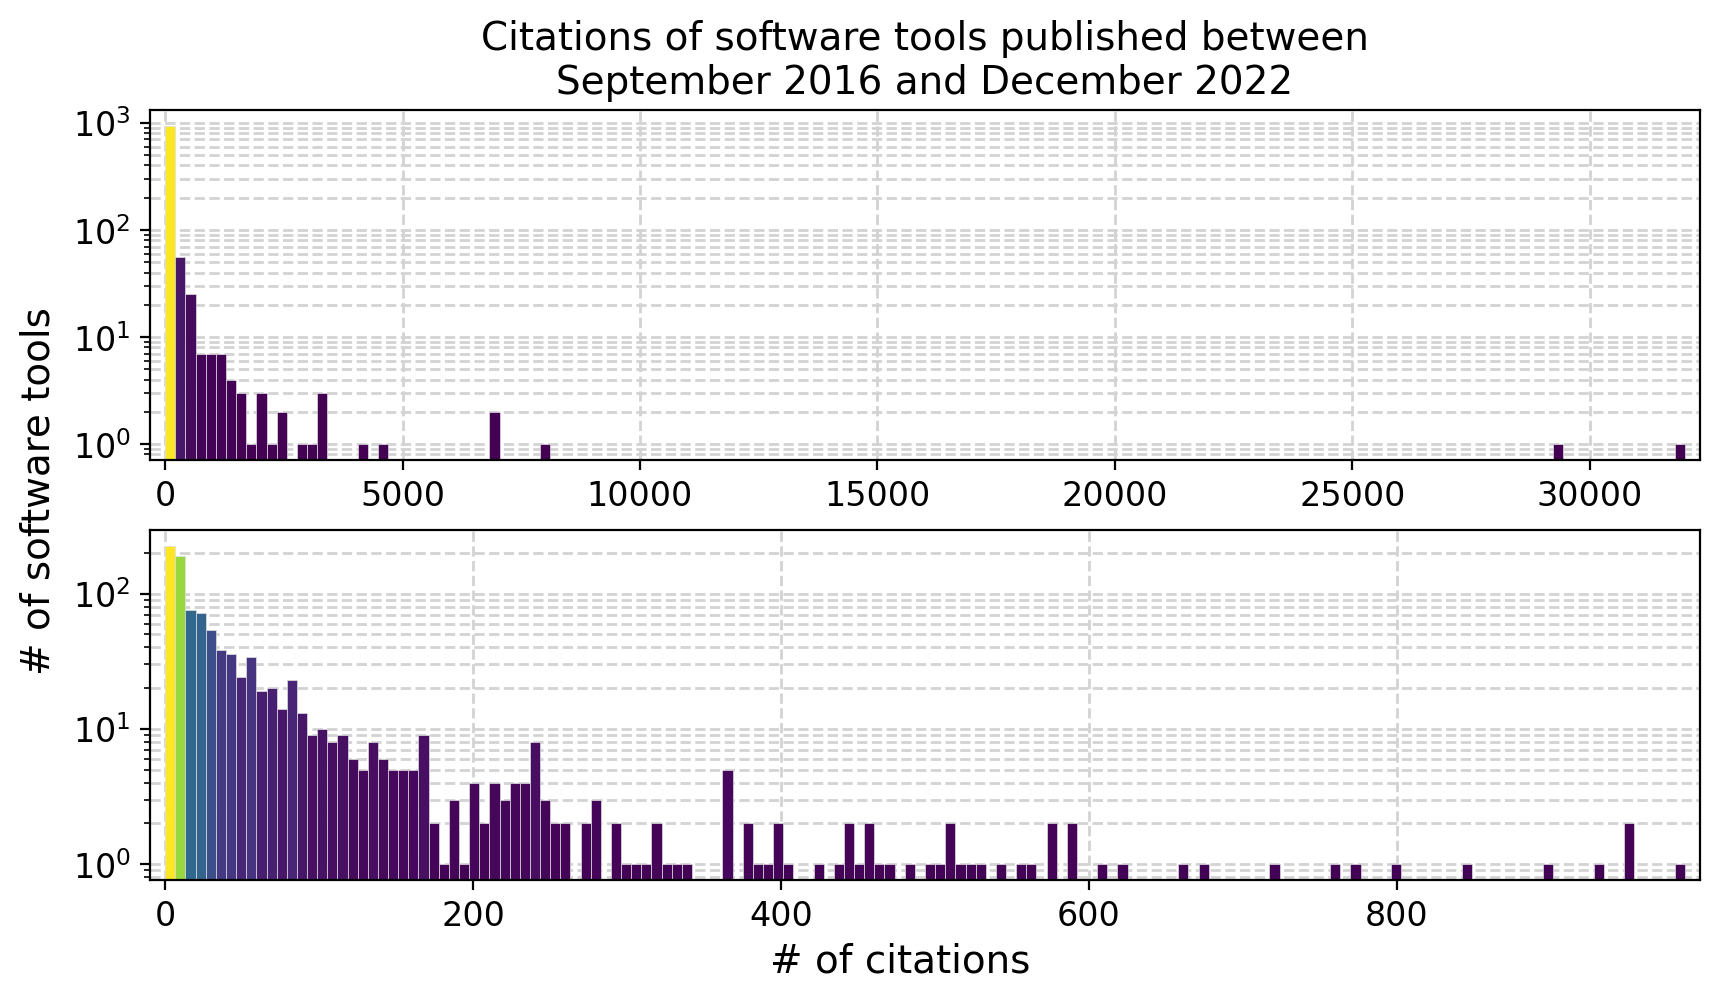

In [56]:
fig,axs = plt.subplots(figsize=(10,5), nrows = 2)
fontsize = 14

## Plot all tools
ax = axs[0]
cit_nums = tool_df_short["Citations"].values

# bins = np.max(cit_nums)
bins = 150
n, bins, patches = ax.hist(cit_nums, bins=bins, facecolor='tab:blue', edgecolor='#e0e0e0', linewidth=0.25, alpha=1)

# Add colormap to bins
n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

# # Make 0 citations bin stand out
# patches[0].set_fc('tab:red')

ax.set_title(f"Citations of software tools published between\nSeptember 2016 and December 2022", fontsize=fontsize)

## Plot tools with less than X citations
ax = axs[1]
cit_nums = tool_df_short[tool_df_short["Citations"] <= 1000]["Citations"].values

# bins = np.max(cit_nums)
bins = 150
n, bins, patches = ax.hist(cit_nums, bins=bins, facecolor='tab:blue', edgecolor='#e0e0e0', linewidth=0.25, alpha=1)

# Add colormap to bins
n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

# ax.set_xlabel("# of citations", fontsize=fontsize)

fig.supxlabel("# of citations", fontsize=fontsize)
fig.supylabel("# of software tools", fontsize=fontsize, x=0.06)

for ax in axs:
  ax.set_yscale("log")

  ax.tick_params(axis="both", labelsize=fontsize-2)

  ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
  ax.set_axisbelow(True)
  ax.margins(x=0.01)

fig.savefig("citations_histograms.png", dpi=300, bbox_inches="tight")

fig.show()

In [65]:
tool_df_short["Citations"] = tool_df_short["Citations"].astype(int)

total = len(tool_df_short)
no_cits = len(tool_df_short[tool_df_short["Citations"] == 0])
range1 = len(tool_df_short[tool_df_short["Citations"] < 100])
range2 = len(tool_df_short[tool_df_short["Citations"] > 100])
range3 = len(tool_df_short[tool_df_short["Citations"] > 1000])

print(f"# of published tools: {total}")
print(f"# of tools with 0 citations: {int(no_cits)} ({int((no_cits/total)*100)}%)")
print(f"# of tools with < 100 citations: {int(range1)} ({int((range1/total)*100)}%)")
print(f"# of tools with > 100 citations: {int(range2)} ({int((range2/total)*100)}%)")
print(f"# of tools with > 1000 citations: {int(range3)} ({int((range3/total)*100)}%)")

# of published tools: 1065
# of tools with 0 citations: 23 (2%)
# of tools with < 100 citations: 850 (79%)
# of tools with > 100 citations: 214 (20%)
# of tools with > 1000 citations: 35 (3%)


In [67]:
tool_df_short.sort_values("Citations", ascending=False)

,Name,Platform,DOIs,Pub Dates,Citations,Code,Description,License,Categories,Updated,Year
1546,STAR,C/C++,"10.1093/bioinformatics/bts635, 10.1101/2021.05...","2012-10-25, NA",32005,https://github.com/alexdobin/STAR,"STARsolo: mapping, demultiplexing and gene qua...",MIT,"Alignment, Quantification, UMIs",2021-06-28,2012
1430,Seurat,R,"10.1016/j.cell.2019.05.031, 10.1016/j.cell.202...","2019-06, 2021-06, 2015-04-13, 2018-04-02, 2023...",29316,https://github.com/satijalab/seurat,It contains easy-to-use implementations of com...,GPL-3.0,"Clustering, Differential Expression, Dimension...",2024-01-05,2019
744,Monocle,R,"10.1038/nbt.2859, 10.1038/nmeth.4150, 10.1038/...","2014-03-23, 2017-01-23, 2017-08-21, NA",7912,https://github.com/cole-trapnell-lab/monocle-r...,Differential expression and time-series analys...,Artistic-2.0,"Clustering, Differential Expression, Dimension...",2018-03-14,2017
955,salmon,C++,"10.1038/nmeth.4197, 10.1093/bioinformatics/bta...","2017-03-06, 2020-07-13, NA, NA, NA, 2019-03-27",7030,https://github.com/COMBINE-lab/salmon,Salmon produces transcript-level quantificatio...,GPL-3.0,"Quantification, UMIs",2020-04-14,2019
639,kallisto,C/C++,"10.1038/nbt.3519, 10.1038/s41587-021-00870-2, ...","2016-04-04, 2021-04-01, 2019-01-21, NA, NA, NA...",7011,https://github.com/pachterlab/kallisto,kallisto produces transcript-level quantificat...,BSD-2-Clause,"Quantification, UMIs",2023-11-24,2019
...,...,...,...,...,...,...,...,...,...,...,...
933,RNA-combine,Python/Shell/R,10.1186/s12859-021-04549-y,2022-01-06,0,https://github.com/dongxuemin666/RNA-combine,A toolkit for comprehensive analysis on multip...,MIT,"Alignment, Classification, Clustering, Dimensi...",2022-01-14,2022
461,fasthplus,R,"10.1093/biostatistics/kxac035, 10.1101/2022.02...","2022-09-05, NA",0,https://github.com/ntdyjack/fasthplus,The fasthplus R package provides fast approxim...,CC-BY-4.0,Clustering,2023-01-04,2022
733,MitoHEAR,R,10.21105/joss.04265,2022-06-01,0,https://github.com/ScialdoneLab/MitoHEAR,MitoHEAR (Mitochondrial HEteroplasmy AnalyzeR)...,GPL-3.0,"Clustering, Variants, Visualisation",2022-06-10,2022
812,OmicInt,R,10.1016/j.ailsci.2021.100025,2021-12,0,https://github.com/AusteKan/OmicInt,OmicInt is an R package developed for an in-de...,GPL-3.0,"Gene Networks, Visualisation",2021-12-17,2021
